In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from scipy.stats import ttest_ind

# homemade functions
import biofoods_module as bfm

plt.style.use("seaborn")

# Проучване на потребителското поведение относно био храните на семейните и несемейни потребители
## от Александър Атанасов Пеев

## 1. Въведение

В настоящия проект ще извършим анализ на пазарните сегменти на българския пазар за био храни. Сегментите ще бъдат разделени по демографския критерий, *семейно положение*. Задачата на проекта е да разгледаме дали има съществена разлика между отговорите на семейните и несемейни купувачи. Ако се констатира съществена разлика, тогава организацията ще трябва да разработи различен микс от елементи на маркетинговите политики(продуктова политика, комуникационна политика, ценова политика и дистрибуционна политика) за всеки от двата сегмента. Анализа ще бъде направен върху резултатите от проведено маркетинг проучване, направено посредством количественият метод – Анкетно проучване. <br>

В началото ще се запознаем с характера на био храните. След това ще разгледаме тенденциите на пазара за био храни - в глобален мащаб, регионален мащаб(европейския пазар) и локален мащаб (пазара за био храни в България). Ще продължим с теоретична обосновка за разделяне на потребителите на сегменти и теоретична обосновка за избора на демеграфския критерий: _семейно положение_. <br>

След това ще преминем към прочитане, запознаване и почистване на данните; за целта ще изпозлваме библиотеката на програмния език Python: _Pandas_. Ще отсеем семейните респонденти от несемейните и накрая ще проверим следните две хипотези:
- $H_{0}$: Няма съществена разлика между двата пазарни сегмента.
- $H_{1}$: Между двата сегмента съществува разлика, която не се дължи на случайност.

## 2. Същност на био храните
### Що е био храни?

Какво се има в предвид, когато става въпрос за *био храни*? Няма международен консенсус по въпроса, затова всеки регион дефинира и регулира тяхното производството по различен начин. Общоприето е био храните да се култивират без употребата на ГМО семена, изкуствени торове, както и синтетични пестициди. Вместо това при биологичното животновъдство и растениевъдство се използват по-традиционни методи за производство на храна, като например ротация на култури. <br>
Биологичното производство е цялостна система за управление на фермите и производството на храни, която съчетава най-добрите екологични практики, високо ниво на биологично разнообразие, опазване на природните ресурси, прилагане на високи стандарти за хуманно отношение към животните. Те са произведени с използване на естествени вещества и процеси. По този начин методът на биологично производство играе двойна обществена роля, където от една страна осигурява специфичен пазар, отговарящ на потребителското търсене на биологични продукти, а от друга страна предоставя обществени блага, допринасящи за опазването на околната среда и хуманното отношение към животните. Био продуктите също допринасят и за развитието на селските райони. <br>

### Тенденции на глобалния пазар
_* Данните са взети от https://statistics.fibl.org/ за 2017 г._

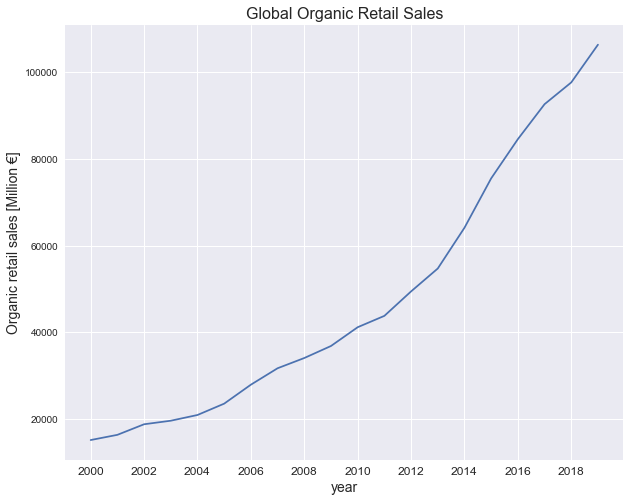

In [3]:
# *fibl statistics Organic retail sales 2019

world_sales_df = pd.read_excel("data/global_retail_sales_2019.xlsx")
years = world_sales_df.year
y_label = "Organic retail sales [Million €]"

plt.figure(figsize=(10, 8))
plt.plot(world_sales_df.year, world_sales_df["sales [Million €]"])
plt.title("Global Organic Retail Sales", fontsize=16)
plt.xlabel("year", fontsize=14)
plt.ylabel(y_label, fontsize=14)
plt.xticks(years[0:years.size:2], fontsize=12)
plt.show()

Наблюдава се стабилен ежегоден прираст на глобалния пазар за биологични храни. Според проучването “The World Of Organic Agriculture Statistics and Emerging Trends 2019” (Светът на биологичното земеделие. Статистики и възникващи тенденции): направено през 2019 година от двете НПО: Научноизследователски институт за биологично земеделие (FiBL) и Международна федерация на движенията за биологично земеделие (IFOAM), световният пазар за био храни достига 97 милиарда щатски долара за 2017 година (приблизително 175 милиарда лева).

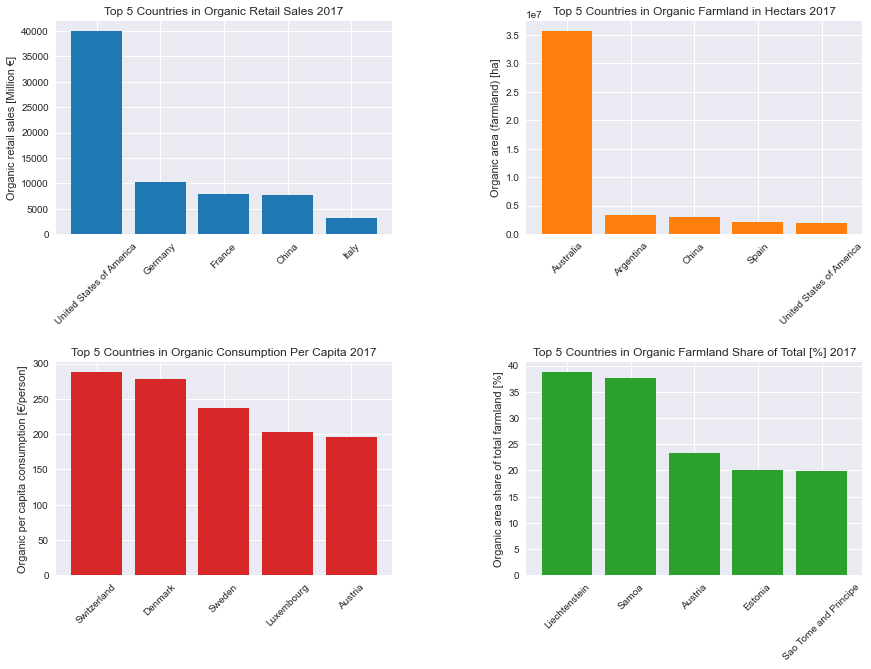

In [4]:
bfm.plot_world_organic_subplots()

__Що се касае до Европа__ към края на 2017, 14,6 милиона хектара  обработваема земя (12,8 милиона хектара за Европейския съюз) се използва за био култивиране от около 397 000 производителя (305 000 от Европейския съюз). В Европа 2,9% от аграрната площ е органична (Европейския съюз: 7,2%). Органичната земеделска земя се е увеличила с повече от 1 милион хектара в сравнение с 2016. Страните с най – голяма биологична земеделска площ са Испания (2,1 милиона хектара), Италия (1,9 милиона хектара) и Франция (1,7 милиона хектара). В 10 държави около 10% от обработваемата земя е предназначена за био продукция, като водещи са Лихтенщайн (37,9%), Австрия (24%) и Естония (20,5%). Общата продажба на дребно за органични продукти възлиза на 75,7 милиарда евро за 2017 година (Европейски съюз: 66, 9 милиарда евро), която се е увеличила с 10,5% в сравнение с 2016 година. Страната с най-големият пазар за био продукти за 2017г. е Германия, чиято търговия на дребно е генерирала 19,5 милиарда лева, последвана от Франция (15 милиарда лева) и Италия (6 милиарда лева). Общият брой на европейските държави, които имат приети нормативни актове касаещи регулиране органичното производство е 42, включително Русия и Украйна, които обнародват своите законопроекти през 2018 година. Европейските потребители средно отделят по 91, 65 лева на глава от населението за 2017 година (130 лева за Европейския съюз). Консумирането на био храни се е удвоило през последното десетилетие. Швейцарците  водят в потреблението на глава от населението, което средно е 561 лева. <br>

__Как изглежда Българския пазар за био храни?__ 
В България за 2017, 136 629 хектара или 2,9% от обработваемата земя се използва за производството на биологични продукти, което поставя страната на 24-то място в Европа. В сравнение с предходната 2016 година, забелязваме спад с 23 991 хектара или с – 14,9%. Като 88 166 хектара от тези 136 629 са в процес на приспособяване за органично земеделие. Забелязваме здравословен ръст при търговията на дребно в България, като линията на тренда в периода 2006-2017 година е възходяща. Към 2017 година търговията на дребно е на стойност около 29 милиона евро, което е с повече от 1 милион евро увеличение в сравнение с предходната 2016 година или ръст с около 0,36%. Пазарът на био продукти в България е все още млад, като бум на приходите в бранша и изобщо повишаване на интересът на потребителите се наблюдава едва в последното десетилетие. Началото на интересът към био храните и като цяло към здравословният начин на живот съвпада с влизането на България в Европейския съюз през 2007 година. В сравнение със страните от Западна и Централна Европа пазарът за био продукти в България е все още в зародишен етап. Докато потребителите от страните членки на Европейския съюз отделят средно по 67 евро на глава от населението годишно за 2017 година, то в България те отделят едва 4,11 евро годишно. Ако за Европейският съюз и Европа това изглежда незначително, то ако сравним стойността за България от предходните година се забелязва ускорен прираст. За периода 2016-2017 година производители на биологични продукти намалява от 6 964 на 6 471 в корелация със спада на органичната обработваема земя за същият период. 

## 3. Теоретична обосновка
### 3. 1. Сегментиране на пазара
_Използван източник: __Банчев, Петър__. 2010. Сегментиране на пазара, от *Маркетинг*. Велико Търново. стр. 178-190._

Сегментирането на пазара е процес, дейност по разделяне на пазара на отделни хомогенни части чрез групиране на купувачите по определени признаци. Сегментирането позволява да се достигне възможно най-висока идентичност между изискванията на купувачите и офертата на продавачите. В резултата на сегментирането се оформят пазарни сегменти. Това са относително обособени части от пазара (групи купувачи), които реагират по приблизително еднакъв начин на маркетинговите въздействия на продавачите. За сегментирането на пазара има строго установена процедура. Сегментирането на пазара минава през следните три етапа: изследване, анализ и профилиране. <br> 

### 3.2. Влияние на семейството върху потребителското поведение
_Използван източник: __Рускова, Свилена__. 2011. Тема 10. Влияние на семейството върху потребителското поведение. Цикъл на семейния живот. , от *Лекции по потребителско поведение*. Русе. стр. 25-33._ 

__Природа на семействата__ <br>

Съществена част от анализа на потребителските характеристики
е разбирането на това как възниква решението за покупка в
различните семейства.
*Семейството* е един от определящите
фактори, оказващи въздействие върху процеса на вземане на
решение от потребителите. Според определението, дадено от
Националния статистически институт (НСИ), семейството се състои
от най-малко двама души с кръвна връзка по между си по силата на
брак, живеещи на семейни начала или осиновяване. Като семейства
могат да се разглеждат следните комбинации:  <br>
- двама съпрузи (сключили граждански брак или живеещи на
семейни начала) без деца;
- двама съпрузи (сключили граждански брак или живеещи на
семейни начала) с едно или няколко невстъпвали в брак деца,
независимо от възрастта им;
- един родител с едно или няколко невстъпвали в брак деца,
независимо от възрастта им.

Така посочените варианти на семейство се наричат още
първични семейства. Освен тях се срещат и разширените семейства,
които са изградени от първичното семейство и други роднини,
например родителите на един от двамата съпрузи.  <br>
В днешно време типичното разбиране за семейство се среща все
по-рядко. Много често се срещат двойки, които живеят на семейни
начала без брак, както от противоположни полове, така и
представени от еднополови индивиди.  <br>
По данни на НСИ от преброяването, проведено през 2011 г.,
най-общата тенденция в структурата на населението по семейно
положение за изминалите 10 години се изразява в намаляване на
дела на женените/омъжените лица за сметка на
неженените/неомъжените лица и на лицата в съжителство без брак
(http://www.nsi.bg/census2011/NPDOCS/Census2011final.pdf). Тези
факти безспорно се отразяват и на потребителските предпочитания
и поведение.  <br>
Друг, използван термин при описването на купувачите, е
домакинството. То е всяка заета жилищна единица, в която живеят
заедно различни лица и споделят общи разходи, независимо от
връзките, съществуващи между тях. Много е важно тези две понятия
да се разграничават.  <br>
Както домакинството, така и семейството трябва да бъдат
наблюдавани и изследвани, тъй като формиралите се в тях
взаимоотношения влияят директно върху избора и закупуването на
определени продукти и търговски марки.  <br>

Семейството, в което е роден човек, се нарича “ориентиращо”.
То влияе върху неговите възгледи за религия, политика,
образование и много други елементи от живота му, включително
неговото поведение при купуване. Семейството, което той ще
създаде чрез женитба, е неговото семейство на родител, отделна
икономическа единица, която купува мебели, къщи, домашни
прибори. Влиянието на това семейство върху поведението при
купуване е дори по-директно от това на “ориентиращото семейство”.
<br>

__Роля и влияние на семейството върху вземане на
решение за покупка__ <br>

Вземането на решение за покупка в семейството може да бъде
съвместно или индивидуално. Индивидуално се вземат решения,
когато конкретната стока е свързана повече със специфичната роля
на съпруга или съпругата в семейството. Смята се, че мъжете
купуват всичко, което отива извън дома, докато жените пазаруват
всичко, влизащо вкъщи. Съпругът доминира при покупка на
автомобил, техника за градината, инструменти и застраховки, а
съпругата - на домакински уреди, облекло и хранителни стоки.
Съвместни решения се вземат при покупки на недвижима
собственост, мебели, почивки. <br>

__Условия, които трябва да се имат предвид от
организациите по отношение на вземането на
решение за покупка в семейството__ <br>
1. Много решения за покупка се вземат в семейството.
2. Поведението на човек при пазаруване има за начало
семейството. Децата се научават на образци за поведение на пазара
от родителите си.
3. Ролите в семейството и предпочитанията към определени
продукти са модели, които децата наблюдават и които по-късно
имитират, когато пораснат или създадат свое собствено семейство.
Предаването на предпочитания към определени търговски марки е
важна част от усилията на организацията.
4. Решенията за покупка в семейството са смес от
взаимодействието на семейството и вземането на индивидуално
решение. Продуктите, купени въз основа на влиянието на
семейството, трябва да бъдат предлагани на пазара различно от
тези купувани, въз основа на индивидуални решения. 
5. Изборът на стоки и услуги в семейството може да се изменя
под въздействието на:
- структурни промени в семейството: наличие на брак;
възраст на главата на семейството; възраст на останалите членове
на семейството; наличие на деца; професионална заетост и
ангажираност на членовете на семейството.
- структурни промени в технологията за производство на
търсените стоки и услуги;
- социални промени, водещи до следните изменения в
семейните взаимоотношения (Костина, Г., Н., Моисеева, 2010):
- сплотеност - степента на изградени емоционални връзки
между членовете на семейството, т.е. до колко отделните
членове на семейството са духовно близки помежду си или
между тях съществува неразбирателство.
- адаптивност - способността на отделните членове на
семейството да променят задълженията, ролите и правилата
на взаимоотношения в семейството, в зависимост от влиянието
на конкретни ситуации или в съответствие с етапа от своето
житейско развитие.
- комуникативност - начинът, по който общуват
представителите на семейството, когато вземат решение за
покупка. Комуникативността в семейството се определя от
силата на въздействие на положителните (умение за
изслушване и оказване на морална подкрепа) или
отрицателните (двуличие, необоснована критичност,
двойствен морал) комуникационни навици.
6. Съвместни решения в семейството се вземат, когато:
- се прецени, че рискът от покупката е голям;
- решението е важно за всички членове на семейството;
- двойката скоро е сключила брак или живее на семейни
начала
- в семейството все още няма деца.
7. Индивидуални решения се вземат:
- при ограничена наличност на време;
- при семейства с деца
- при двойки, които вярват в традиционните полово-ролеви
стереотипи.
8. Установено е, че при семействата с по-ниски доходи
решенията, за покупка при пазаруване се вземат от жените, а при
тези с по-високи доходи - от мъжете. При средни доходи най-често
се наблюдава съвместно вземане на решение от двамата съпрузи.
9. Работещите жени вземат самостоятелни решения при
пазаруване поради ограниченото време, с което разполагат заради
това.
10. Семейството действа като интерпретатор на културните и
социални въздействия върху индивидуалността

## 4. Анализ на данните
### 4. 1. Прочит на данните, запознаване с тях и почистване
- __Прочитане на данните__

In [5]:
df = pd.read_excel("data/Anketa-BioFood-Feb2019-Zadochno-Responses.xlsx", sheet_name="Form responses 1")

In [6]:
df.head()

,Timestamp,"1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.5. Понятието „биохрани“ е равнозначно на екохрани и органик храни]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.6. Истински биохрани не се предлагат на пазара]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.7. Друго (моля разяснете):]",2. До каква степен познавате особеностите на биохраните и ползата от консумацията им? (посочете само един отговор),"3. До каква степен предпочитате следните източници на иформация, когато се информирате за биохрани? (от 1 - не предпочитам, до 5 - силно предпочитам) [3.1. Приятели, които купуват биохрани]",...,"17. Коя е Вашата най-вероятна реакция в случай, че закупите фалшиви биохрани? (посочете само един отговор)",18. Вашият пол е:,19. В коя възрастова група попадате:,20. Семейното Ви положение е:,21. Завършеното от Вас образование е:,22. Вашият статус е:,23. В кой интервал попадате според месечния Ви доход?,24. Местоживеене (населено място):,Телефон за връзка с респондента:,"Факултетен № и име на студента, провел анкетата:"
0,2019-02-14 14:54:50.844,5.0,5.0,5.0,5.0,5.0,4.0,5.0,Имам обща представа;,5.0,...,"ще сменя обекта, от който купувам",жена,2) 26 г.- 30 г.,"семеен с деца, най-малкото от които е до 6 г. ...",5) висше бакалавър,2) работещ,2) 561 - 860 лв.,Русе,0892284343,165520 Теодора Даскалова
1,2019-02-14 15:19:05.334,3.0,4.0,4.0,5.0,5.0,1.0,1.0,Имам обща представа;,2.0,...,ще спра да купувам биохрани изобщо,мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",6) висше магистър,2) работещ,4) 1161 - 1460 лв.,Варна,+359899997682,165517 Мирослав Михов
2,2019-02-14 15:27:19.285,3.0,4.0,4.0,2.0,2.0,1.0,3.0,Познавам някои видове;,2.0,...,"ще сменя обекта, от който купувам",мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",3) средно специално,2) работещ,2) 561 - 860 лв.,Русе,0887268062,165517 Мирослав Михов
3,2019-02-14 15:42:31.550,3.0,3.0,1.0,5.0,1.0,3.0,1.0,Имам обща представа;,2.0,...,"ще предупредя само близки, познати и приятели ...",жена,4) 36 г.- 40 г.,"семеен с деца, най-малкото от които на 7 или п...",5) висше бакалавър,2) работещ,3) 861 – 1160 лв.,Русе,0888681466,165517 Мирослав Михов
4,2019-02-14 15:47:52.671,1.0,1.0,5.0,5.0,5.0,1.0,5.0,Задълбочено познавам тези продукти;,1.0,...,ще потърся повече информация за това как да ги...,мъж,1) 18 г.- 25 г.,несемеен;,2) средно общообразователно,2) работещ,3) 861 – 1160 лв.,Русе,0882761361,185530 Александър Пеев


In [7]:
df.tail()

,Timestamp,"1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.5. Понятието „биохрани“ е равнозначно на екохрани и органик храни]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.6. Истински биохрани не се предлагат на пазара]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.7. Друго (моля разяснете):]",2. До каква степен познавате особеностите на биохраните и ползата от консумацията им? (посочете само един отговор),"3. До каква степен предпочитате следните източници на иформация, когато се информирате за биохрани? (от 1 - не предпочитам, до 5 - силно предпочитам) [3.1. Приятели, които купуват биохрани]",...,"17. Коя е Вашата най-вероятна реакция в случай, че закупите фалшиви биохрани? (посочете само един отговор)",18. Вашият пол е:,19. В коя възрастова група попадате:,20. Семейното Ви положение е:,21. Завършеното от Вас образование е:,22. Вашият статус е:,23. В кой интервал попадате според месечния Ви доход?,24. Местоживеене (населено място):,Телефон за връзка с респондента:,"Факултетен № и име на студента, провел анкетата:"
121,NaT,119.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaT,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaT,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39,39.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На пръв поглед, забелязваме малко на брой наблюдения, с множество променливи.

In [8]:
df.shape

(126, 85)

Това се потвърждава, от формата на таблицата с данни. <br>
Изглежда сме прочели данните правилно.<br>

Нека разгледаме типът на стойностите(values).

In [9]:
df.dtypes

Timestamp                                                                                                                                                                                                                     datetime64[ns]
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]                                 float64
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]                  float64
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]                          float64
1. Според Вас, доколко следните твърдения съответств

Поради големия брой наблюдения не успяваме да разгледаме всичките.
<br>Нека променим опциите на pandas, за да разгледаме типът на всички наблюдения.

In [10]:
pd.set_option('display.max_rows', 120)

In [11]:
df.dtypes

Timestamp                                                                                                                                                                                                                                                                                          datetime64[ns]
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]                                                                                                      float64
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]                                                                                       float64
1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (о

Типът на стойностите от проучвателните въпроси са "float64" или стойности с плаваща точка, а тези на класификацаионните въпроси са "string". <br>Това е допълнително обоснование за разделянето на таблицата на две.

След като разгледахме типът на стойностите, нека върнем първоначалните настройки на pandas.

In [12]:
pd.reset_option("max_rows")

<br>

- __Запознаване с данните__ <br>

Да започнем с етикетите на колоните:

In [13]:
df.columns

Index(['Timestamp',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съ

<br>
<br>
На пръв поглед таблицата се състои от две части. Първата част съдържа въпроси по същността на разглеждания проблем, а втората част се състои от класицикационни въпроси, отнасящи се до различни характеристики на респондента - пол, възраст, образование, големина на доходи и т. н. Което следва правилата при правене на анкетни проучвания, а именно класификационните въпроси да се поставят накрая, понеже са деликатни въпроси, които биха накарали респондентите да се чувстват като на разпит и би ги отблъснало още в самото начало на интервюто, което разбира се не е желателно.
<br>

- __Почистване на данните__

Горепрочетената таблица трябва да бъде почистена и разделена на две таблици: първата съдържаща класификационните въпроси, тя ще бъде именувана __participants_data__, а втората, ще съдържа проучвателните въпроси, нея ще назовем __participants_answers__.

Друго нещо, на което е важно да обърнем внимания е, че първото наблюдение, *Timestamp* или датата и часът на предадената анкета, са всъщност отделни участници в проучването. Всяка комбинация от час и дата е равна на един респондент. 
Може да предположим, че наблюденията, където Timestamp e __NA__, са недействителни. Нека видим дали има такива в разглежданата таблица:

In [14]:
df['Timestamp'].isna().any()

True

In [15]:
df[df['Timestamp'].isna()]

,Timestamp,"1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.5. Понятието „биохрани“ е равнозначно на екохрани и органик храни]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.6. Истински биохрани не се предлагат на пазара]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.7. Друго (моля разяснете):]",2. До каква степен познавате особеностите на биохраните и ползата от консумацията им? (посочете само един отговор),"3. До каква степен предпочитате следните източници на иформация, когато се информирате за биохрани? (от 1 - не предпочитам, до 5 - силно предпочитам) [3.1. Приятели, които купуват биохрани]",...,"17. Коя е Вашата най-вероятна реакция в случай, че закупите фалшиви биохрани? (посочете само един отговор)",18. Вашият пол е:,19. В коя възрастова група попадате:,20. Семейното Ви положение е:,21. Завършеното от Вас образование е:,22. Вашият статус е:,23. В кой интервал попадате според месечния Ви доход?,24. Местоживеене (населено място):,Телефон за връзка с респондента:,"Факултетен № и име на студента, провел анкетата:"
119,NaT,3.571429,4.302521,4.092437,3.529412,3.655462,2.789916,1.890756,NaN,3.512605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaT,119.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaT,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,0.410256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaT,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39,39.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получената таблица, изглежда, съдържа резултати от функции правени в Excel, които на нас не ни вършат работа. 
Затова ще премахнем съответните редове и ще присвоим получената таблица на __df__.

In [16]:
timestamp = df.columns[0]
df = bfm.remove_nan_observations(df, timestamp)

Обикновено при онлайн анкетните проучвания, има опасност от придобиване на резултати от недействителни респонденти. Затова стандартна практика при този тип проучвания е да се изисква телефонния номер на респондента. Идеята е да се провери дали получените отговори са от действително(реално) лице. <br>
Затова нека разгледаме стойностите в колоната "Телефон за връзка с респондента:".

In [17]:
df["Телефон за връзка с респондента:"]

0         0892284343
1      +359899997682
2         0887268062
3         0888681466
4         0882761361
           ...      
114        111111111
115       0893205487
116           111111
117           111111
118       0887745273
Name: Телефон за връзка с респондента:, Length: 119, dtype: object

Всеки телефонен номер на български оператор се състои от десет цифри и започва с нула; или тринадесет символа(първите четири символа "+359" са международен код, съответстващ на нулата.). И двата метода на изписване са правилни. 
Спокойно можем да предположим, че номера, които се състоят от по-малко или повече от десет символа, не са равни на тринадесет, започват със символ различен от нула или "+359", са недействителни и можем да ги премахнем. След като почистим колоната от недействителните телефонни номера, ще стандартизираме номерата, тоест символите "+359", ще станат "0", и ще премахнем разстоянието между цифрите. 

In [18]:
phone_number = "Телефон за връзка с респондента:"
df = bfm.clean_phone_feature(df, phone_number)

Колоната "Факултетен № и име на студента, провел анкетата:", се предполага е с цел проверка от преподавателя, който е възложил проучването, за това колко активен е бил всеки студент. За нашите цели, това не носи никаква информация и спокойно можем да я премахнем.

In [19]:
df["Факултетен № и име на студента, провел анкетата:"]

0      165520 Теодора Даскалова
1         165517 Мирослав Михов
2         165517 Мирослав Михов
3         165517 Мирослав Михов
4        185530 Александър Пеев
                 ...           
109     165522 Кремена Стоянова
111     165522 Кремена Стоянова
112     165522 Кремена Стоянова
115        165521 Веска Русева 
118     165522 Кремена Стоянова
Name: Факултетен № и име на студента, провел анкетата:, Length: 85, dtype: object

In [20]:
# Функция, която ще премахне подадена колона от таблица.
df = bfm.drop_feature(df, "Факултетен № и име на студента, провел анкетата:")


Нека се върнем на колоната __Timestamp__ .

In [21]:
df.Timestamp

0     2019-02-14 14:54:50.844
1     2019-02-14 15:19:05.334
2     2019-02-14 15:27:19.285
3     2019-02-14 15:42:31.550
4     2019-02-14 15:47:52.671
                ...          
109   2019-02-21 00:17:38.084
111   2019-02-21 21:26:12.040
112   2019-02-21 21:41:52.490
115   2019-02-22 13:57:30.417
118   2019-02-23 12:18:08.804
Name: Timestamp, Length: 85, dtype: datetime64[ns]

Изглежда това е уникален идентификатор на всеки респондент, който съдържа датата и часът на предаване на анкетата.

За да потвърдим, че това действително е уникален идентификатор ще проверим за дубликати във въпросната колона:

In [22]:
df["Timestamp"].duplicated().any()

False

Изглежда, предположението се потвърждава.

Но ролята на уникален идентификатор могат да играят и индексите. 
Преди да разделим таблицата на две, нека рестартираме индексите, за да може всеки индекс от таблицата с проучвателните въпроси, да съответства на респондент, със същия индекс от таблицата съдържаща класификационните въпроси.

In [23]:
df = df.reset_index()

Нека почистим таблицата, като премахнем старите индекси и колоната "Timestamp" (от последната вече нямаме нужда).

In [24]:
features_to_drop = ["index", "Timestamp"]
df = bfm.drop_feature(df, features_to_drop)

Разделяме двете таблици и получаваме таблица съдържаща единствено класифициращи въпроси, която присвояваме на новата таблица __participants_data__, а таблицата съдържаща проучвателните въпроси, която присвояваме на __participants_answers__.

In [25]:
participants_data_columns = ["18. Вашият пол е:", "19. В коя възрастова група попадате:", "20. Семейното Ви положение е:",
    "21. Завършеното от Вас образование е:", "22. Вашият статус е:", "23. В кой интервал попадате според месечния Ви доход?",
    "24. Местоживеене (населено място):", "Телефон за връзка с респондента:"]

In [26]:
# bfm.divide_table - Функция, която ще раздели таблицaтa на две
participants_data, participants_answers = bfm.divide_table(df, participants_data_columns)

In [27]:
participants_data.head()

,18. Вашият пол е:,19. В коя възрастова група попадате:,20. Семейното Ви положение е:,21. Завършеното от Вас образование е:,22. Вашият статус е:,23. В кой интервал попадате според месечния Ви доход?,24. Местоживеене (населено място):,Телефон за връзка с респондента:
0,жена,2) 26 г.- 30 г.,"семеен с деца, най-малкото от които е до 6 г. ...",5) висше бакалавър,2) работещ,2) 561 - 860 лв.,Русе,0892284343
1,мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",6) висше магистър,2) работещ,4) 1161 - 1460 лв.,Варна,0899997682
2,мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",3) средно специално,2) работещ,2) 561 - 860 лв.,Русе,0887268062
3,жена,4) 36 г.- 40 г.,"семеен с деца, най-малкото от които на 7 или п...",5) висше бакалавър,2) работещ,3) 861 – 1160 лв.,Русе,0888681466
4,мъж,1) 18 г.- 25 г.,несемеен;,2) средно общообразователно,2) работещ,3) 861 – 1160 лв.,Русе,0882761361


In [28]:
participants_answers.head()

,"1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.5. Понятието „биохрани“ е равнозначно на екохрани и органик храни]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.6. Истински биохрани не се предлагат на пазара]","1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.7. Друго (моля разяснете):]",2. До каква степен познавате особеностите на биохраните и ползата от консумацията им? (посочете само един отговор),"3. До каква степен предпочитате следните източници на иформация, когато се информирате за биохрани? (от 1 - не предпочитам, до 5 - силно предпочитам) [3.1. Приятели, които купуват биохрани]","3. До каква степен предпочитате следните източници на иформация, когато се информирате за биохрани? (от 1 - не предпочитам, до 5 - силно предпочитам) [3.2. Телевизия и радио]",...,"13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.5. По-висока трайност спрямо традиционните.]","13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.6. Наличие на здравословен проблем.]","13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.7. Желание за здравословен начин на живот.]","13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.8. Производството им не замърсява околната среда.]","13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.9. По-здравословно е отглеждането им за самите производители.]","13. Доколко всяко от следните условия е/ би било/ определящо, за да купувате биохрани: от 1 (най-малко значимо) до 5 (най-определящо)\t\t\t\t [13.10. Хуманно отношение към животните при отглеждането им.]","14. Ако сте купували биохрани до момента, коя би била основната причина да преустановите потреблението на биохрани в бъдеще? (посочете само един отговор)","15. До каква степен считате, че е вероятно да се сблъскате с фалшификати на биохрани на пазара?","16. Кое негативно последствие при попадане на фалшиви биохрани считате, че е вероятно да възникне? (посочете само един отговор)","17. Коя е Вашата най-вероятна реакция в случай, че закупите фалшиви биохрани? (посочете само един отговор)"
0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,Имам обща представа;,5.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,Голямо увеличение на цените им;,5.0,да не получа желания здравословен ефект;,"ще сменя обекта, от който купувам"
1,3.0,4.0,4.0,5.0,5.0,1.0,1.0,Имам обща представа;,2.0,2.0,...,1.0,5.0,5.0,5.0,5.0,5.0,Нищо не би ме отказало да ги консумирам;,5.0,да не получа желания здравословен ефект;,ще спра да купувам биохрани изобщо
2,3.0,4.0

### Почистването и подреждането на таблицата съдържаща класификационните въпроси

Етикети на колоните (всички, без колоната 'Телефон за връзка с респондента'), съдържат число и затваряща скоба, които съответства на категорията на въпроса. Нека премахнем числото.

In [29]:
new_columns = list(participants_data.columns[:-1].str.slice(4)) 
new_columns.append(participants_data.columns[-1]) 
participants_data.columns = new_columns

Стойностите също съдържат, число, което съответства на категорията на отговора.
Ще я премахнем, защото не ни носи никаква информация.

In [30]:
participants_data["Семейното Ви положение е:"] = participants_data["Семейното Ви положение е:"].str.strip(";.")

In [31]:
participants_data["В коя възрастова група попадате:"].str.slice(2)

0       26 г.- 30 г.
1      41 г. - 45 г.
2      41 г. - 45 г.
3       36 г.- 40 г.
4       18 г.- 25 г.
           ...      
80     41 г. - 45 г.
81      18 г.- 25 г.
82      18 г.- 25 г.
83      26 г.- 30 г.
84     51 г. – 55 г.
Name: В коя възрастова група попадате:, Length: 85, dtype: object

In [32]:
participants_data.head()

,Вашият пол е:,В коя възрастова група попадате:,Семейното Ви положение е:,Завършеното от Вас образование е:,Вашият статус е:,В кой интервал попадате според месечния Ви доход?,Местоживеене (населено място):,Телефон за връзка с респондента:
0,жена,2) 26 г.- 30 г.,"семеен с деца, най-малкото от които е до 6 г. ...",5) висше бакалавър,2) работещ,2) 561 - 860 лв.,Русе,0892284343
1,мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",6) висше магистър,2) работещ,4) 1161 - 1460 лв.,Варна,0899997682
2,мъж,5) 41 г. - 45 г.,"семеен с деца, най-малкото от които на 7 или п...",3) средно специално,2) работещ,2) 561 - 860 лв.,Русе,0887268062
3,жена,4) 36 г.- 40 г.,"семеен с деца, най-малкото от които на 7 или п...",5) висше бакалавър,2) работещ,3) 861 – 1160 лв.,Русе,0888681466
4,мъж,1) 18 г.- 25 г.,несемеен,2) средно общообразователно,2) работещ,3) 861 – 1160 лв.,Русе,0882761361


Таблицата с класификационните въпроси вече изглежда почистена и подредената.

#### Почистване и подреждане на таблицата съдържаща проучвателните въпроси
Ще приложим __pandas.melt()__, за да приведем таблицата в по-лесен за работа формат.

In [33]:
participants_answers_melt = bfm.melt_dataframe(
                                                participants_answers,
                                                id_vars = "index",
                                                var_name = "question",
                                                value_name = "answer")

In [34]:
participants_answers_melt

,index,question,answer
0,0,"1. Според Вас, доколко следните твърдения съот...",5.0
1,1,"1. Според Вас, доколко следните твърдения съот...",3.0
2,2,"1. Според Вас, доколко следните твърдения съот...",3.0
3,3,"1. Според Вас, доколко следните твърдения съот...",3.0
4,4,"1. Според Вас, доколко следните твърдения съот...",1.0
...,...,...,...
6370,80,17. Коя е Вашата най-вероятна реакция в случай...,"ще сменя обекта, от който купувам"
6371,81,17. Коя е Вашата най-вероятна реакция в случай...,ще агитирам други потребители чрез социалните ...
6372,82,17. Коя е Вашата най-вероятна реакция в случай...,"ще сменя обекта, от който купувам"
6373,83,17. Коя е Вашата най-вероятна реакция в случай...,"ще сменя обекта, от който купувам"


Нека разгледаме получената таблицата. <br>
Започваме с липсващите данни.

In [35]:
participants_answers_melt.isna().sum()

index         0
question      0
answer      928
dtype: int64

Очаквано, липсващите данни са от колона __answer__. Тоест това е пропуск направен от респондента. <br>
След като констатирахме наличието на липсващи данни, пред нас стои въпросът, какво да правим с тях. <br>
Съществуват няколко варианта: <br>
- Да премахнем редовете, които съдържат липсващите данни;
- Да запълним клетките с някаква стойност, например середноаритметичното или нула. <br>

В нашият случай, понеже липсващите данни, са пропуск в отговора на някой въпрос, запълването им със средноаритметична стойност или нула, би повлияло на крайния резултат при анализа, затова ще ги премахнем.

In [36]:
participants_answers_melt = participants_answers_melt.dropna()

In [37]:
participants_answers_melt.isna().sum()

index       0
question    0
answer      0
dtype: int64

<br>
Преминаваме към почистването на въпросите.

In [38]:
participants_answers_melt.question.unique()

array(['1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.2. Храни, произведени без допълнителни химически добавки и обработки]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.3. Храни, които не съдържат генетично модифицирани организми]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.4. Произведени са при регламентирани условия от сертифицирани производители]',
       '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - на

На пръв поглед, забелязваме, че някои въпроси се състоят от няколко "съставни части". <br>
1. Номерът на въпроса;
2. Самият въпрос;
3. Разясняваще бележка за респондента;
4. Номер на предположение;
5. Предположението.

Да вземем за пример първия въпрос:

In [39]:
first_question = participants_answers_melt.question.unique()[0]
first_question_num = first_question.partition('.')[0]
the_question = first_question.partition('.')[2].partition('(')[0].strip()
note = first_question.partition('(')[1] + first_question.partition('(')[2].partition('[')[0].strip("]")
assumption_number = first_question.partition(') [')[2].rpartition(".")[0]
assumption = first_question.rpartition('.')[2].strip().strip(']')

print()
print(f"Въпросът: '{first_question}'")
print()
print(f"\t\u2022 Номерът на въпроса: '{first_question_num}'")
print(f"\t\u2022 Самият въпрос: '{the_question}'")
print(f"\t\u2022 Бележка за респондента: '{note}'")
print(f"\t\u2022 Номерът на предположението: '{assumption_number}'")
print(f"\t\u2022 Предположението: '{assumption}'")


Въпросът: '1. Според Вас, доколко следните твърдения съответстват на понятието „биохрани“? (от 1 - въобще не съответства, до 5 - напълно съответства) [1.1. Храни, произведени в домашни условия (или на село)]'

	• Номерът на въпроса: '1'
	• Самият въпрос: 'Според Вас, доколко следните твърдения съответстват на понятието „биохрани“?'
	• Бележка за респондента: '(от 1 - въобще не съответства, до 5 - напълно съответства) '
	• Номерът на предположението: '1.1'
	• Предположението: 'Храни, произведени в домашни условия (или на село)'


Обаче има и въпроси, които нямат предположения. <br>
_Например:_

In [40]:
second_question = participants_answers_melt.question.unique()[7]
second_question_num = second_question.partition('.')[0]
the_question = second_question.partition('.')[2].partition('(')[0].strip()
grading_scale = second_question.partition('(')[1] + second_question.partition('(')[2].partition('[')[0].strip("]")

print()
print(f"Въпросът: '{second_question}'")
print()
print(f"\t\u2022 Номерът на въпроса: '{second_question_num}'")
print(f"\t\u2022 Самият въпрос: '{the_question}'")
print(f"\t\u2022 Бележка за респондента: '{grading_scale}'")


Въпросът: '2. До каква степен познавате особеностите на биохраните и ползата от консумацията им? (посочете само един отговор)'

	• Номерът на въпроса: '2'
	• Самият въпрос: 'До каква степен познавате особеностите на биохраните и ползата от консумацията им?'
	• Бележка за респондента: '(посочете само един отговор)'


Можем да разделим всеки въпрос на пет променливи. <br>
Променливите ще бъдат, както следва:
- __question_number__;
- __questions__;
- __note__;
- __assumption_number__;
- __assumption__.

При въпросите, които нямат предположения, за __assumption_number__, ще им бъде присвоен номерът на въпроса, а за __assumption__, ще им бъде присвоен самият въпрос.

За да проверим, кои въпроси имат предположения ще използваме булева стойност. <br>
Предположенията се съдържат в квадратни скоби. <br>
Затова булевата стойност ще провери кои въпроси съдържат квадратни скоби. <br>
Стринга след отваряща квадратна скоба е предположението. <br>
Затварящата скоба ще бъде премахната с метода __string.strip()__.

In [41]:
assumption_and_numbers = bfm.get_assumption_with_number(participants_answers_melt, 'question')


Нека проверим дали получената колона е подредена и ако не е, ще трябва да я подредим според индексите. <br>
Целта е индексите да отговарят на индексите от таблицата __participants_answers_melt__.

In [42]:
assumption_and_numbers.index.is_monotonic_increasing

True

In [43]:
assumption_and_numbers.index.equals(participants_answers_melt.index)

True

<br>
Преминаваме към разделянето на въпроса на отделни колони и инициализиране на нова подредена таблица, съдържаща проучвателните въпроси.

In [44]:
question_num = bfm.get_question_number(participants_answers_melt, "question")
the_question = bfm.get_the_question(participants_answers_melt, "question")
note = bfm.get_note(participants_answers_melt, "question")
assumption_num = bfm.get_assumption_number(assumption_and_numbers)
assumption = bfm.get_assumption(assumption_and_numbers)

In [45]:
participants_answers_melt["question_num"] = question_num.astype(int)
participants_answers_melt["the_question"] = the_question
participants_answers_melt["note"] = note
participants_answers_melt["assumption_num"] = assumption_num.astype(float)
participants_answers_melt["assumption"] = assumption

In [46]:
participants_answers_clean = participants_answers_melt[["index", "question_num", "the_question", "note", "assumption_num", "assumption", "answer"]]

Преди да разделим семейните от несемйни потребители, нека обърнем внимание на променливите от колоните: "Ако сте купували биохрани до момента, коя би била основната причина да преустановите потреблението на биохрани в бъдеще?", "Кое негативно последствие при попадане на фалшиви биохрани считате, че е вероятно да възникне?" "Коя е Вашата най-вероятна реакция в случай, че закупите фалшиви биохрани?" 

In [47]:
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 2].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 2].answer.unique())
print()
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 4].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 4].answer.unique())
print()
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 8].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 8].answer.unique())
print()
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 14].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 14].answer.unique())
print()
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 16].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 16].answer.unique())
print()
print(f"{participants_answers_clean[participants_answers_clean['question_num'] == 17].the_question.unique()[0]}:")
print(participants_answers_clean[participants_answers_clean["question_num"] == 17].answer.unique())

До каква степен познавате особеностите на биохраните и ползата от консумацията им:
['Имам обща представа;' 'Познавам някои видове;'
 'Задълбочено познавам тези продукти;' 'Не съм запознат.'
 'Знам, че се предлагат на пазара, но нищо повече;']

Колко често купувате биохрани:
['Поне веднъж седмично и по-често;'
 'Не съм купувал никога; (Моля, продължете с въпрос 11)'
 'Веднъж на няколко месеца и по-рядко;' 'Еднократно;'
 'Поне веднъж месечно;']

Кой в семейството Ви основно консумира биохрани:
['Всички в семейството;' 'Никой;' 'Аз' 'Детето/ децата'
 'Член на семейството със здравословен проблем;' 'Съпругът/ съпругата'
 'Друг:']

Ако сте купували биохрани до момента, коя би била основната причина да преустановите потреблението на биохрани в бъдеще:
['Голямо увеличение на цените им;'
 'Нищо не би ме отказало да ги консумирам;'
 'Нееднократно закупуване на фалшификати;' 'Намаляване на дохода ми;'
 'Друго']

Кое негативно последствие при попадане на фалшиви биохрани считате, че е вероятно да

За разлика от останалите отговори, те са стрингове, а не числа с плаваща запетая, каквито са другите отговори. Това представлява проблем, понеже функцията, която ще ползваме за съпоставяне на пазарните сегменти не работи със стрингове. Затова ще заменим отговорите с число с подвижна запетая.


In [48]:
def string_to_float(dataframe, column, question_num):
    new_df = dataframe
    values_to_replace = new_df[new_df["question_num"] == question_num][column].unique()
    new_values = np.arange(1, new_df[new_df["question_num"] == question_num].answer.unique().size + 1).astype(float)
    new_df[column].replace(values_to_replace, new_values, inplace=True)
    
    return new_df

In [49]:
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 2)
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 4)
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 8)
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 14)
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 16)
participants_answers_clean = string_to_float(participants_answers_clean, "answer", 17)

Нека отделим семейните потребители от несемейните.

In [50]:
single_data = participants_data[participants_data["Семейното Ви положение е:"].isin(["несемеен", "разведен без деца"])]

In [51]:
family_data = participants_data[~participants_data["Семейното Ви положение е:"].isin(["несемеен", "разведен без деца"])]

In [52]:
single_answers = participants_answers_clean[participants_answers_clean["index"].isin(single_data.index)]

In [53]:
family_answers = participants_answers_clean[participants_answers_clean["index"].isin(family_data.index)]


### 4. 2. Анализ на данните

Ако ще анализираме популация чрез извадка, е важно, данните от извадката да бъдат придобите по колкото се може по-случаен принцип, за да не получим грешни и изкривени резултати. При работа с извадки от популация, съществува проблемът за _отклонението_(изместване, предубеждение). Тоест данните ни може да наклонят анализа в определена посока и в резултат да се получи свръх-представителност на една група за сметка на друга. Един пример, който дава Томас Нийлд в книгата си "Essential Math For Data Science" е: _Да кажем, че съм студент в Университета на щата Аризона. Искам да разбера по колко часа на седмица американските студенти прекарват в гледане на телевизия. Затова излизам пред общежитието си и започвам да разпитвам студентите, които минават покрай сградата. За няколко часа съм готов със събирането на данните си. Какъв е проблемът с тази ситуация?_ <br>
_Проблемът е, че извадката ни от студенти ще има **отклонение**. Защо? Ами защото задачата, която си поставихме в началото е да анализираме студентите в САЩ, а не студентите на Университета в щата Аризона. Тоест правя извадка на студенти, само от един университет. Ами ако някои обствоятелства карат студентите на Аризона да гледат повече телевизият от колегите си в други градове. Ако например поради по-високата средна температура, студентите прекарват повече време на закрито, гледайки телевизия, за разлика от студентите от щати с по-умерен климат, които пък прекарват повече време навън. Това е само един примерен проблем с този метод на събиране на данни._<br>

За да преодолеем горепосочения проблем, е необходимо данните ни да бъдат събрани на колкото е възможно по-случаен принцип.
Затова преди да преминем към тестването на хипотезите нека разгледаме колко разпръснати(случайни) са респондените ни.

#### В духа на примера, нека разгледаме разпределението по географски критерии. От къде идват респондентите ни?

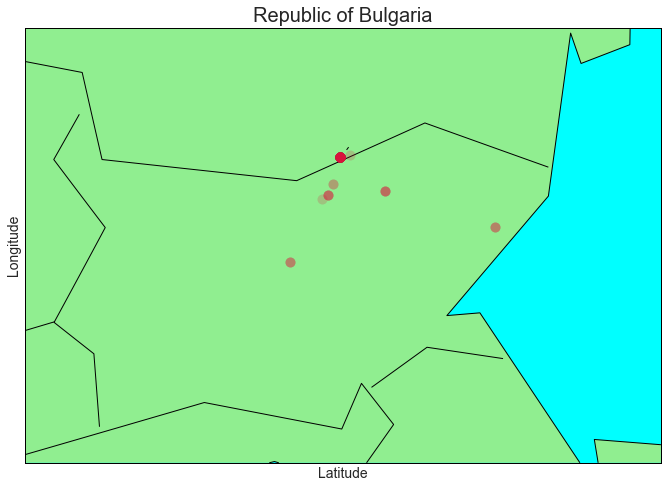

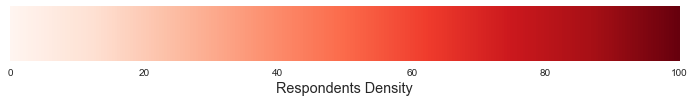

In [54]:
lat_dict = {"Русе": 43.835571,
            "Борово": 43.4907,
            "Разград": 43.5267,
            "Варна": 43.204666,
            "Габрово": 42.87500001,
            "Две могили": 43.5936,
            "Бяла": 43.45996,
            "Николово": 43.8573}

lng_dict = {"Русе": 25.965654,
            "Борово": 25.8115,
            "Разград": 26.5242,
            "Варна": 27.910543,
            "Габрово": 25.3339996,
            "Две могили": 25.875,
            "Бяла": 25.73914,
            "Николово": 26.0929}

bfm.plot_basemap_places(participants_data, lat_dict, lng_dict)

In [55]:
# Все пак и тук ше се наложи данните да бъдат подредени и почистени
# Тази задача ще бъде изпълнена от bfm.tidy_place_col(dataframe)

bfm.tidy_place_col(participants_data)["Местоживеене (населено място):"].value_counts()

Русе          67
Борово         4
Разград        4
Варна          3
Габрово        3
Две могили     2
Бяла           1
Николово       1
Name: Местоживеене (населено място):, dtype: int64

Изглежда всичките ни респонденти са от Северен централен район на България(включва областите: Велико Търново, Габрово, Разград, Русе и Силистра); по-конкретно изглежда, че респондентите ни са предимно от Област Русе (Борово, Две могили, Бяла и Николово са населени места към Област Русе).
Този резултат беше очакван, понеже студентите, които са извършили анкетното проучване са от русенския университет и те най-вероятно са анкетирали хора от обкръжението си.
Виждаме, че данните съдържат отклонения. Тоест поставената в началото задача, да анализираме потребителското поведение на семейните и несемейни потребители на био храни на българския пазар, не може да бъде изпълнена чрез горепосочените данни. Причините са няколко: средната работна заплата се различава, както между Северна България и Южна България, така и между отделните региони на страната. Няма да е уместно да приложим резултатите от извадка с по-ниска покупателна способност към извадка с по-висока и обратното. <br>

Затова вместо да прекъснем проучването тук, нека формираме нова задача. Тя ще бъде, както следва: 
- _Анализ на потребителското поведение на семейните и несемейни потребители на био храни от Северен централен район на България_. 

Друго нещо, което следва да проверим е размера на извадката от всеки сегмент. <br>
Понеже не можем да тестваме цялото население, е прието, че извадка от 31 респондента и повече ще оформи нормално разпределение.

In [56]:
print(f"Семейни потребители: {family_data.shape[0]}")
print(f"Несемейни потребители: {single_data.shape[0]}")

Семейни потребители: 45
Несемейни потребители: 40


### Тестване на хипотезите

- $H_{0}$: Няма съществена разлика между двата пазарни сегмента.
- $H_{1}$: Между двата сегмента съществува разлика, която не се дължи на случайност.

За тестването на хипотезите ще бъде използван независим т-тест. Ще използваме независимия т-тест, защото участниците от групите не са свързани помежду си. Обаче как да решим дали да използваме _"Т-тест на Уелч"_, който приема, че извадките имат различаваща се дисперсия или _"Стандартен т-тест"_, който приема, че извадките имат равна дисперсия? За да решим кой да изберем, ще трябва да сметнем дисперсиите на двете извадки. За целта ще ползваме _pandas_ функцията __dataframe.var()__. След това ще проверим съотношението между двете дисперсии и ако е по-малко от __4__ ще приемем, че дисперсиите са сравнително равни.

In [57]:
single_varience = single_answers.answer.var()
family_varience = family_answers.answer.var()

print(f"Дисперсия на несемейния сегмент: {single_varience}")
print(f"Дисперсия на семейния сегмент: {family_varience}")

Дисперсия на несемейния сегмент: 2.2307071340478433
Дисперсия на семейния сегмент: 2.1655273567090285


In [58]:
var_ratio = single_varience/family_varience

print(f"Съотношение между двете дисперсии: {var_ratio}")

if var_ratio < 4:
    print("След като съотношението е по-малко от четири, дисперсиите са сравнително равни.")
    print("Приложи Стандартен т-тест.")
else:
    print("След като съотношението е повече от четири, дисперсиите се различават.")
    print("Приложи т-тест на Уелч.")  

Съотношение между двете дисперсии: 1.0300988011704775
След като съотношението е по-малко от четири, дисперсиите са сравнително равни.
Приложи Стандартен т-тест.


In [59]:
t_test = ttest_ind(single_answers.answer, family_answers.answer, equal_var = True)

print(f"p-value = {t_test.pvalue}")

# Общоприето е прагът за статистическа значимост да бъде 5%. 
if t_test.pvalue <= 0.05: 
    print("Същестува значителна разлика. Отхвърли нулевата хипотеза!")
else:
    print("Няма достатъчно данни, за да бъде отхвърлена нулевата хипотеза.")

p-value = 0.0013106390680473516
Същестува значителна разлика. Отхвърли нулевата хипотеза!


### 5. Заключение

От полученият резултат можем да заключим, че значителната разлика между отговорите на представителите от двата сегмента, има 0.13% шанс да е получена по случайност. Тоест разликата между потребителското поведение на двата пазарни сегмента, е достатъчно голяма, за да обоснове разработването на различна маркетингова стратегия за семейните и несемейни потребители на пазара за био храни от Северен централен район на Република България.